# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dinda Putri Khairunnisa
- **Email:** dp42364@gmail.com
- **ID Dicoding:** dindaputri29

## Menentukan Pertanyaan Bisnis

- Apa Hubungan antara Jumlah Penyewaan Sepeda dan Faktor Demografis Pengguna (Casual vs. Registered) dalam Setiap Hari dalam Seminggu?
- Bagaimana Pengaruh Faktor keadaan cuaca terhadap Jumlah Penyewaan Sepeda?
- Bagaimana Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari?
- Pada Bulan Apakah terjadi peningkatan penyewaan sepeda dan apakah cuaca cukup berperan?
- Bagaimana distribusi penyewaan sepeda berdasarkan rentang suhu, apakah suhu yang lebih tinggi menghasilkan lebih banyak penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
file_path = 'C:/Users/Marcus Tan/Downloads/day.csv'
day_df = pd.read_csv(file_path)
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [7]:
file_path = 'C:/Users/Marcus Tan/Downloads/hour.csv'
hour_df = pd.read_csv(file_path)
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Dari tabel yang telah ditampilkan terdapat struktur dari masing masing tabel yaitu terdiri dari (tanggal, musim, tahun, bulan, jam penyewaan, kategori situasi cuaca, suhu, kelempapan, kecepatan angin, jumlah pengguna, dan total penyewaan
- untuk tabel hari memuat data penyewaan sepeda berdasarka hari, dan untuk tabel jam memuat data penyewaan sepeda berdasarkan jam
- dari data yang ada juga dapat dilihat beberapa pengaruh dari musim, cuaca, hari libur atau hari kerja, serta waktu terhadap banyaknya penyewa sepeda

### Assessing Data

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada tabel Day (hari) saat dilakukan pengecekan tipe data terdapat kesalahan pada tipe data untuk dteday yaitu object yang seharusnya adalah date&time
- saat dilakukan pengeceka jumlah duplikasi ternyata tidak menunjukan adanya data yang duplikat, dan juga tidak menunjukan keanehan pada nilai pada day_df 

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tabel hour (jam) saat dilakukan pengecekan tipe data terdapat kesalahan pada tipe data untuk dteday yaitu object yang seharusnya adalah date&time
- saat dilakukan pengecekan jumlah duplikasi ternyata tidak menunjukan adanya data yang duplikat, dan juga tidak menunjukan keanehan pada nilai pada hour_df 

### Cleaning Data

In [14]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Dilakukan cleaning pada day_df dan hour_df untuk mengubah tipe data pada coloumn dteday menjadi tipe data untuk tanggal
- setelah dilakukan cleaning tipe data berubah menjadi date&time

## Exploratory Data Analysis (EDA)

### Explore Data Day_df

In [18]:
grouped_data = day_df.groupby(['weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})
print (grouped_data)

         casual  registered     cnt
weekday                            
0        140521      303506  444027
1         70784      384719  455503
2         57843      411266  469109
3         57319      415729  473048
4         61460      423935  485395
5         78238      409552  487790
6        153852      323955  477807


**Insight:**
- berdasarkan eksplorasi pada data day_df dapat dilihat bahwa dalam satu minggu penyewaan sepeda banyak dilakukan oleh penyewa yang sudah teregister atau terdaftar dan pada hari kamis.


### Explore Data Hour_df

In [19]:
hour_df.groupby(by="hr")['cnt'].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

**Insight:**
- berdasarkan eksplorasi pada data hour_df dapat dilihat bahwa dalam satu hari penyewaan sepeda banyak dilakukan oleh penyewa pada jam jam produktif atau jam berangkat dan pulang bekerja.

### Explore Data all_df

In [29]:
all_df = pd.merge(
    left= day_df,
    right= hour_df,
    how ="left",
    left_on ="instant",
    right_on ="instant"
)
all_df.head()
print(all_df.columns)

Index(['instant', 'dteday_x', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'dteday_y',
       'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [35]:
grouped_weekday_all = all_df.groupby(['weekday_x']).agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})
print(grouped_weekday_all)

           casual_x  registered_x   cnt_x
weekday_x                                
0            140521        303506  444027
1             70784        384719  455503
2             57843        411266  469109
3             57319        415729  473048
4             61460        423935  485395
5             78238        409552  487790
6            153852        323955  477807


In [36]:
correlation_all = all_df[['cnt_x', 'season_x', 'temp_x', 'hum_x', 'windspeed_x', 'weathersit_x']].corr()
print(correlation_all)

                 cnt_x  season_x    temp_x     hum_x  windspeed_x  \
cnt_x         1.000000  0.406100  0.627494 -0.100659    -0.234545   
season_x      0.406100  1.000000  0.334315  0.205445    -0.229046   
temp_x        0.627494  0.334315  1.000000  0.126963    -0.157944   
hum_x        -0.100659  0.205445  0.126963  1.000000    -0.248489   
windspeed_x  -0.234545 -0.229046 -0.157944 -0.248489     1.000000   
weathersit_x -0.297391  0.019211 -0.120602  0.591045     0.039511   

              weathersit_x  
cnt_x            -0.297391  
season_x          0.019211  
temp_x           -0.120602  
hum_x             0.591045  
windspeed_x       0.039511  
weathersit_x      1.000000  


In [37]:
season_rentals_all = all_df.groupby(by="season_x").instant.nunique().sort_values(ascending=False)
print(season_rentals_all)

season_x
3    188
2    184
1    181
4    178
Name: instant, dtype: int64


In [38]:
weather_rentals_all = all_df.groupby(by="weathersit_x").instant.nunique().sort_values(ascending=False)
print(weather_rentals_all)

weathersit_x
1    463
2    247
3     21
Name: instant, dtype: int64


In [39]:
monthly_rentals_all = all_df.groupby(by="mnth_x")['cnt_x'].sum()
print(monthly_rentals_all)

mnth_x
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt_x, dtype: int64


In [42]:
grouped_month_all = all_df.groupby(['mnth_x']).agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})
print(grouped_month_all)

        casual_x  registered_x   cnt_x
mnth_x                                
1          12042        122891  134933
2          14963        136389  151352
3          44444        184476  228920
4          60802        208292  269094
5          75285        256401  331686
6          73906        272436  346342
7          78157        266791  344948
8          72039        279155  351194
9          70323        275668  345991
10         59760        262592  322352
11         36603        218228  254831
12         21693        189343  211036


In [44]:
hourly_rentals_all = all_df.groupby(by="hr")['cnt_y'].sum()
print(hourly_rentals_all)

hr
0      448
1      301
2      203
3       97
4       45
5      112
6      555
7     1574
8     3839
9     2619
10    1597
11    1729
12    2298
13    2345
14    2251
15    2335
16    2763
17    4394
18    3830
19    2725
20    1831
21    1317
22     987
23     670
Name: cnt_y, dtype: int64


**Insight:**
- berdasarkan eksplorasi pada data day_df dapat dilihat bahwa dalam satu minggu penyewaan sepeda banyak dilakukan oleh penyewa yang sudah teregister atau terdaftar dan pada hari kamis.


## Visualization & Explanatory Analysis

### Pertanyaan 1: - Apa Hubungan antara Jumlah Penyewaan Sepeda dan Faktor Demografis Pengguna (Casual vs. Registered) dalam Setiap Hari dalam Seminggu?


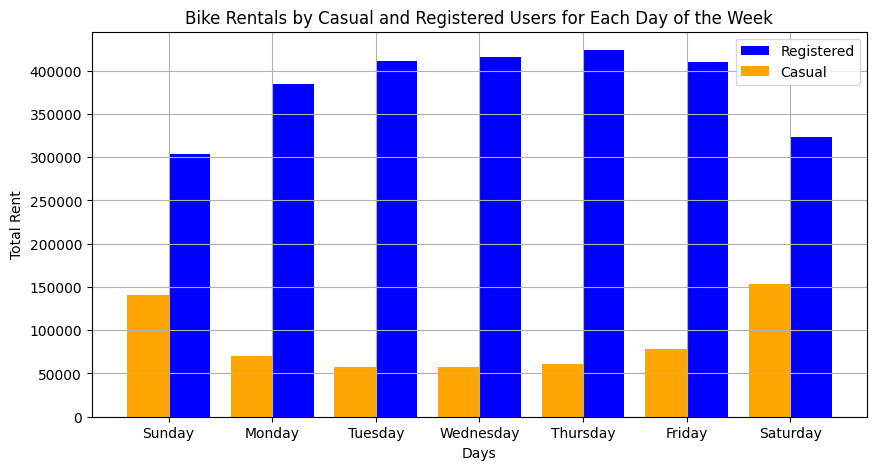

In [45]:
daily_rent_df = all_df.groupby(['weekday_x']).agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})

day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
             4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
daily_rent_df.index = daily_rent_df.index.map(day_names)

daily_rent_df = daily_rent_df.reset_index()

x = np.arange(len(daily_rent_df))
days = daily_rent_df['weekday_x']

plt.figure(figsize=(10, 5))
plt.bar(x + 0.2, daily_rent_df['registered_x'], width=0.4, label='Registered', color='blue')
plt.bar(x - 0.2, daily_rent_df['casual_x'], width=0.4, label='Casual', color='orange')
plt.xlabel('Days')
plt.ylabel('Total Rent')
plt.title('Bike Rentals by Casual and Registered Users for Each Day of the Week')
plt.xticks(ticks=x, labels=days)
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana Pengaruh Faktor keadaan cuaca terhadap Jumlah Penyewaan Sepeda?

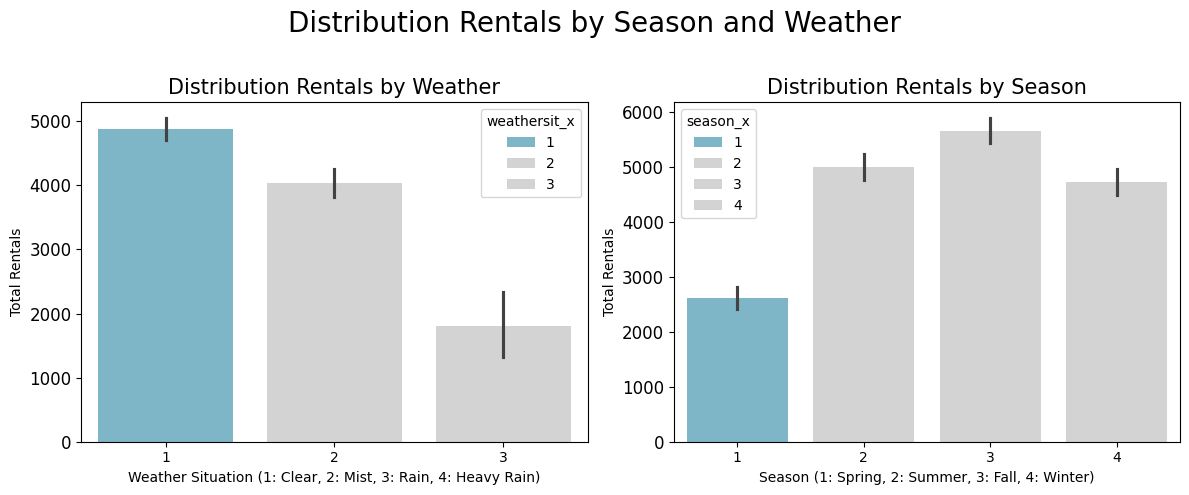

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

colors_weather = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
colors_season = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="weathersit_x", y='cnt_x', data=all_df, hue='weathersit_x', ax=ax[0], palette=colors_weather)
ax[0].set_ylabel('Total Rentals')
ax[0].set_xlabel('Weather Situation (1: Clear, 2: Mist, 3: Rain, 4: Heavy Rain)')
ax[0].set_title('Distribution Rentals by Weather', loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)


sns.barplot(x="season_x", y='cnt_x', data=all_df, hue='season_x', ax=ax[1], palette=colors_season)
ax[1].set_ylabel('Total Rentals')
ax[1].set_xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
ax[1].set_title('Distribution Rentals by Season', loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Distribution Rentals by Season and Weather", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

### Pertanyaan 3: Bagaimana Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari?

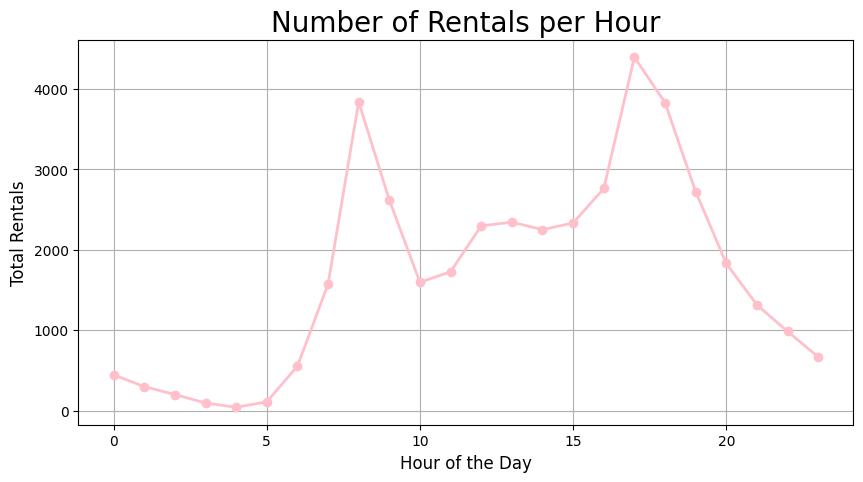

In [54]:
hourly_rent_df = all_df.groupby(by="hr")['cnt_y'].sum()

plt.figure(figsize=(10, 5)) 
plt.plot(hourly_rent_df.index, hourly_rent_df.values, marker='o', linewidth=2, color="pink") 
plt.title("Number of Rentals per Hour", loc="center", fontsize=20) 
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid() 
plt.show()

### Pertanyaan 4: Pada Bulan Apakah terjadi peningkatan penyewaan sepeda dan apakah cuaca cukup berperan?

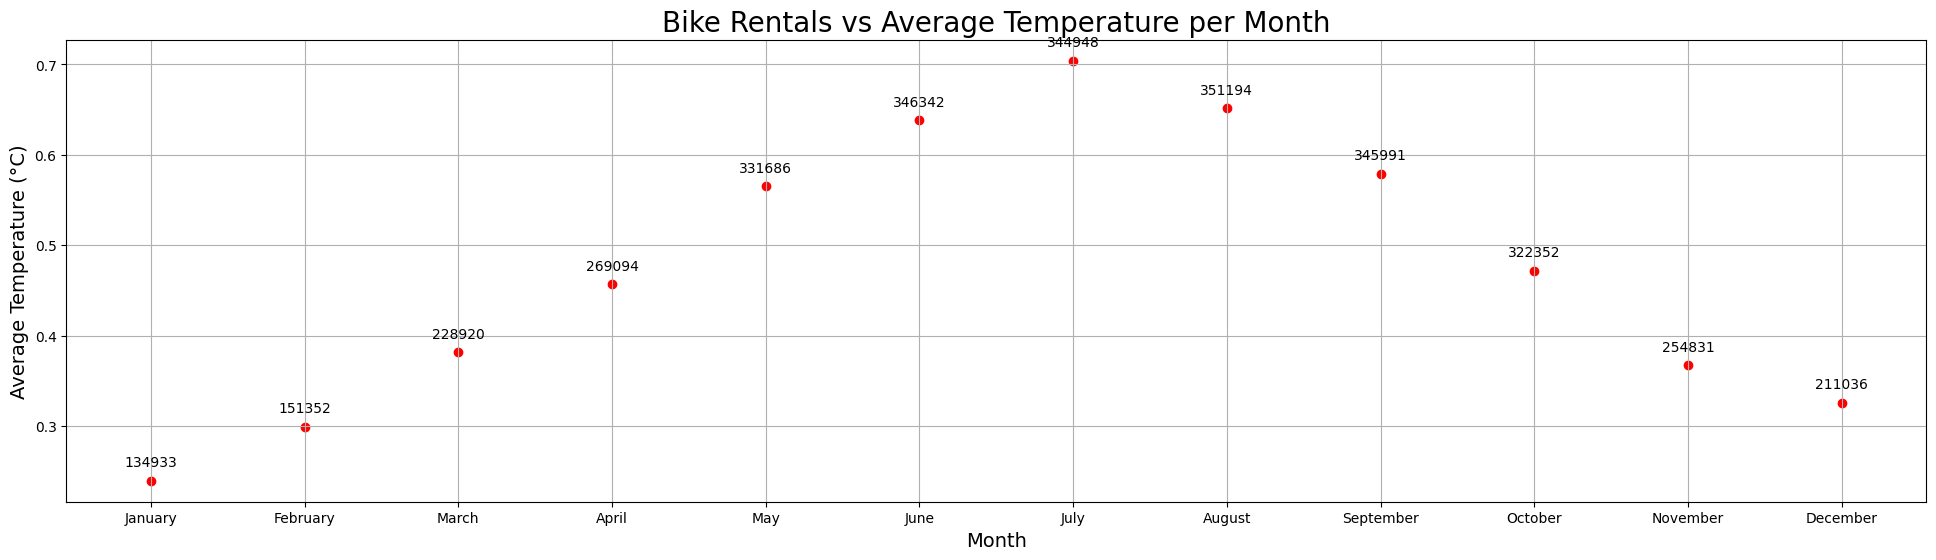

In [57]:
monthly_rent_df = all_df.groupby('mnth_x')['cnt_x'].sum().reset_index()
monthly_weather_df = all_df.groupby('mnth_x').agg({
    'atemp_x': 'mean', 
    'hum_x': 'mean'     
}).reset_index()

monthly_summary_df = pd.merge(monthly_rent_df, monthly_weather_df, on='mnth_x')

month_names = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

monthly_summary_df['month_name'] = monthly_summary_df['mnth_x'].map(month_names)

plt.figure(figsize=(24, 6))
plt.scatter(monthly_summary_df['month_name'], monthly_summary_df['atemp_x'], color='red')
plt.title("Bike Rentals vs Average Temperature per Month", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Temperature (°C)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

for i, row in monthly_summary_df.iterrows():
    plt.annotate(row['cnt_x'], (row['month_name'], row['atemp_x']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Analisis Lanjutan (Binning) Pertanyaan 5 : Bagaimana distribusi penyewaan sepeda berdasarkan rentang suhu, apakah suhu yang lebih tinggi menghasilkan lebih banyak penyewaan sepeda?

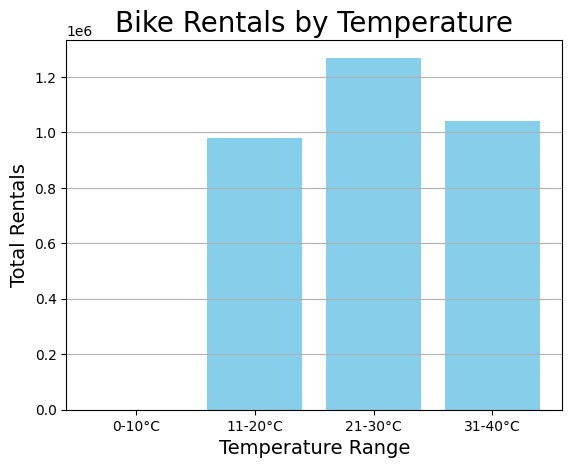

In [60]:
bins = [0, 10, 20, 30, 40]
labels = ['0-10°C', '11-20°C', '21-30°C', '31-40°C']

monthly_summary_df['temp_bin'] = pd.cut(monthly_summary_df['atemp_x'] * 50, bins=bins, labels=labels)
binned_rentals = monthly_summary_df.groupby('temp_bin', observed=False)['cnt_x'].sum().reset_index()

plt.bar(binned_rentals['temp_bin'], binned_rentals['cnt_x'], color='skyblue')
plt.title('Bike Rentals by Temperature', fontsize=20)
plt.xlabel('Temperature Range', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')

plt.show()

**Insight:**
- Pada Tampilan Visual menggunaakan Bar chart, Scatter, Dan Line Chart untuk menampilkan data 

## Conclusion

- Conclution pertanyaan 1
Dari visualisasi penyewaan sepeda, terlihat bahwa pengguna terdaftar lebih sering menyewa sepeda selama hari kerja, menunjukkan penggunaan rutin seperti untuk bekerja atau sekolah. Sebaliknya, pengguna kasual cenderung menyewa sepeda lebih banyak pada akhir pekan, terutama Sabtu dan Minggu, yang berkemungkinan untuk kegiatan rekreasi. Secara keseluruhan, penyewaan oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual pada hari-hari kerja.
- Conclution pertanyaan 2
visualisasi penyewaan sepeda berdasarkan cuaca dan musim, terlihat bahwa jumlah penyewaan sepeda paling tinggi pada cuaca cerah (Clear) dan paling rendah saat hujan atau cuaca buruk. Selain itu, penyewaan sepeda juga lebih banyak terjadi selama musim panas dan gugur, sementara musim dingin menunjukkan penurunan penyewaan yang signifikan. Ini menunjukkan bahwa kondisi cuaca yang lebih baik dan musim yang lebih hangat cenderung mendorong lebih banyak penyewaan sepeda.
- Conclution pertanyaan 3
Dari visualisasi pola penyewaan sepeda berdasarkan waktu dalam sehari, terlihat bahwa jumlah penyewaan sepeda cenderung meningkat pada pagi hari (sekitar jam 7-9 pagi) dan sore hari (sekitar jam 5-7 sore). Ini menunjukkan adanya dua puncak penyewaan yang kemungkinan terkait dengan waktu sibuk, ketika orang-orang berangkat dan pulang dari tempat kerja atau sekolah. Di luar jam-jam tersebut, penyewaan cenderung lebih rendah, terutama pada malam hari.
- Conclution pertanyaan 4
Penyewaan sepeda mengalami peningkatan yang signifikan selama bulan-bulan pada musim panas, khususnya pada bulan Mei hingga Agustus. Hal ini menunjukkan bahwa periode dengan suhu yang lebih hangat membuat lebih banyak orang untuk menggunakan sepeda, diperkirakan untuk transportasi maupun rekreasi. Cuaca sangat berperan penting dalam pola ini, di mana suhu rata-rata yang lebih tinggi cenderung berkorelasi dengan peningkatan jumlah penyewaan. Sebaliknya, selama bulan-bulan dengan suhu yang lebih rendah, terutama di musim dingin, jumlah penyewaan sepeda menurun.
- Conclution pertanyaan 5
Dari visualisasi, terlihat bahwa penyewaan sepeda paling banyak terjadi pada rentang suhu yang lebih hangat, khususnya antara 21-30°C. Menunjukkan bahwa kondisi suhu yang lebih hangat dan nyaman mendorong peningkatan penyewaan sepeda. Sebaliknya, pada suhu yang lebih rendah (0-10°C), penyewaan sepeda jauh lebih sedikit, menunjukkan bahwa cuaca yang lebih dingin mengurangi minat orang untuk menyewa sepeda.

In [ ]:
all_df.to_csv("all_data.csv", index=False)

In [1]:
pip install streamlit babel


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/8.7 MB 2.2 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.7 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.7 MB 2.2 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.4 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.7 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 3.9/8.7 MB 2.4 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.7 MB 2.4 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 2.4 MB/s eta 0:00:02
   ------------------------- -------------- 5.5/8.7 MB 2.4 MB/s eta 0:00:02
   --------------------------- ------------ 6.0/8.7 MB 2.4 MB/s eta 0:00:02
   ----------------------